## Training a word2vec model from scratch

-- Prof. Dorien Herremans

We will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Look for `#TODO` tags throughout the document. 

Note: these models may take a while to train. Be sure to switch the runtime of  Google Colab to us a TPU or GPU hardware accellerator (in the menu at the top). 

Let's start by installing some libraries that we will use:

In [1]:
!pip install gensim
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=66b96817d3583d6cbe11b349315d1c2e7b2913df294a681169a37d0273fd02d4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Now we can import these libraries:

In [4]:
# imports 
import gensim 
import wget

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset. 

We will use the complete works of Shakespeare. You can find the file at https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt

In [5]:
# download the dataset
wget.download("https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt")

'shakespeare.txt'

How does this file look? 

In [6]:
!head -50 shakespeare.txt

1609

THE SONNETS

by William Shakespeare



                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy l

Let's read the input file and convert each line into a list of words (tokenizing). Do do this, we create a function read_input which is called in the penultimate line below: 

In [7]:
def read_input(input_file):
    
    print("reading file...")
      
    with open (input_file, 'r') as f:   
        lines = f.readlines()
        for line in lines:
            # do some pre-processing and return a (tokenized) list 
            # of words for each review text
            # you can print the output here to understand 
            # the preprocessing (tokenizing)
            yield gensim.utils.simple_preprocess (line)

# each review item new becomes a series of words
# this is a list of lists

# point to the location on your filesystem
data_file = 'shakespeare.txt'

documents = list (read_input (data_file))
print("Done reading data file")

reading file...
Done reading data file


In [8]:
documents

[[],
 [],
 ['the', 'sonnets'],
 [],
 ['by', 'william', 'shakespeare'],
 [],
 [],
 [],
 [],
 ['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['that', 'thereby', 'beauty', 'rose', 'might', 'never', 'die'],
 ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
 ['feed',
  'st',
  'thy',
  'light',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel'],
 ['making', 'famine', 'where', 'abundance', 'lies'],
 ['thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel'],
 ['thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament'],
 ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring'],
 ['within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content'],
 ['and', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding'],
 ['pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be'],
 ['to', 'eat', 'the'

Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number

TODO: Set the size of the embeddings to 150 in the first line above (size parameter). 

In [9]:
model = gensim.models.Word2Vec (documents, size = 150, window = 5, min_count = 2, workers = 4)
model.train(documents, total_examples = len(documents), epochs = 10)

(6704006, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word. Remember, the only texts the model has seen is shakespeare!

Which word is most similar to king? (closest distance)?

In [10]:
w1 = "king"
model.wv.most_similar (positive = w1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.6521278023719788),
 ('fifth', 0.5951699018478394),
 ('bolingbroke', 0.5674787759780884),
 ('duke', 0.5634799003601074),
 ('warwick', 0.561461329460144),
 ('ghost', 0.5560348033905029),
 ('gaunt', 0.5381066203117371),
 ('emperor', 0.5339617729187012),
 ('crown', 0.5131914019584656),
 ('sixth', 0.5006529688835144)]

Look up the top 6 words similar to 'smile':

In [11]:
# look up top 6 words similar to 'smile'
w1 = ["smile"]
model.wv.most_similar (positive = w1, topn = 6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('laugh', 0.7472482919692993),
 ('shine', 0.6951683163642883),
 ('frown', 0.6707161068916321),
 ('rail', 0.6588351726531982),
 ('wink', 0.6587458848953247),
 ('grieve', 0.656144380569458)]

TODO: Look up the top 6 words similar to 'france':

In [12]:
# todo
w1 = ["france"]
model.wv.most_similar (positive = w1, topn = 6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('england', 0.6857782602310181),
 ('princess', 0.5710453391075134),
 ('sicilia', 0.5641006231307983),
 ('egypt', 0.5600113868713379),
 ('greece', 0.5572159290313721),
 ('wales', 0.5453433394432068)]

TODO: Look up the top 6 words similar to 'sword':

In [13]:
# todo
w1 = ["sword"]
model.wv.most_similar (positive = w1, topn = 6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('head', 0.7711002826690674),
 ('knife', 0.716023862361908),
 ('pocket', 0.7022700905799866),
 ('fingers', 0.7001334428787231),
 ('weapon', 0.6953103542327881),
 ('throat', 0.6889439225196838)]

Get everything related to royalty and not to 'farmer': 

In [14]:
w1 = ["king",'queen','prince']
w2 = ['farmer']
model.wv.most_similar (positive = w1, negative = w2, topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('princess', 0.6615609526634216),
 ('emperor', 0.5954146981239319),
 ('duke', 0.5709378123283386),
 ('ghost', 0.5644680261611938),
 ('bolingbroke', 0.558383047580719),
 ('warwick', 0.5459460020065308),
 ('cause', 0.541581392288208),
 ('empress', 0.5280225276947021),
 ('sister', 0.5079758763313293),
 ('moor', 0.5072523355484009)]

Explore the similarity (e.g. distance) between two words. Does the result make sense to you?

In [15]:
# similarity between two similar words
model.wv.similarity(w1 = "pretty", w2 = "beautiful")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.55235994

In [16]:
# similarity between two opposing words
model.wv.similarity(w1 = "king", w2 = "farmer")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.012221803

Try some other combinations :) 

In [17]:
#todo
model.wv.similarity(w1 = "king", w2 = "queen")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.39916772

We can even use it to perform more 'smart'/ IQ test type assigments. Which word in this list does not belong? 

In [18]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'france'

If you are interested in plotting the words in a multidimensional space, you can actually get the vector coordinates (word embeddings) of each word: 

In [19]:
model.wv['france']

array([-0.14634775, -0.46907267,  0.8619067 ,  1.2356099 ,  0.10751028,
        0.20064127, -0.6334179 ,  0.39996213, -0.62096846,  0.23459879,
       -1.1113335 , -0.74357706, -0.586133  ,  1.2042345 , -0.34577537,
        1.8880694 ,  0.6829118 ,  0.09039612, -1.28096   ,  0.72736436,
       -1.4061555 , -1.171876  , -0.21636029,  1.1207876 , -0.06531241,
        0.82037866, -0.02665258,  0.5913345 , -0.75297374, -0.16719896,
       -0.61229706,  1.039349  ,  0.7620558 ,  0.44455647, -0.11126839,
        0.72263366, -0.18684494,  0.3224755 , -0.4152451 ,  0.1455131 ,
       -1.3408489 , -1.6793516 , -0.12517715,  0.26889881,  0.8123124 ,
       -0.8744033 ,  0.02962934, -0.14421031,  1.22295   ,  0.66993093,
        0.47464964,  0.96709603, -0.8881549 , -0.04241651, -1.282739  ,
       -0.5559144 ,  0.14957426,  0.0812218 , -1.33612   ,  0.270744  ,
        0.06943208, -0.0515367 , -0.6995704 ,  0.49456456, -0.1696993 ,
        0.62844473,  0.3993295 ,  0.10357574, -0.06492894,  0.07

## Visualising our trained word2vec model using t-SNE: 

Below we visualise the first 100 words of our vocabulary in a 2D t-SNE projection. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


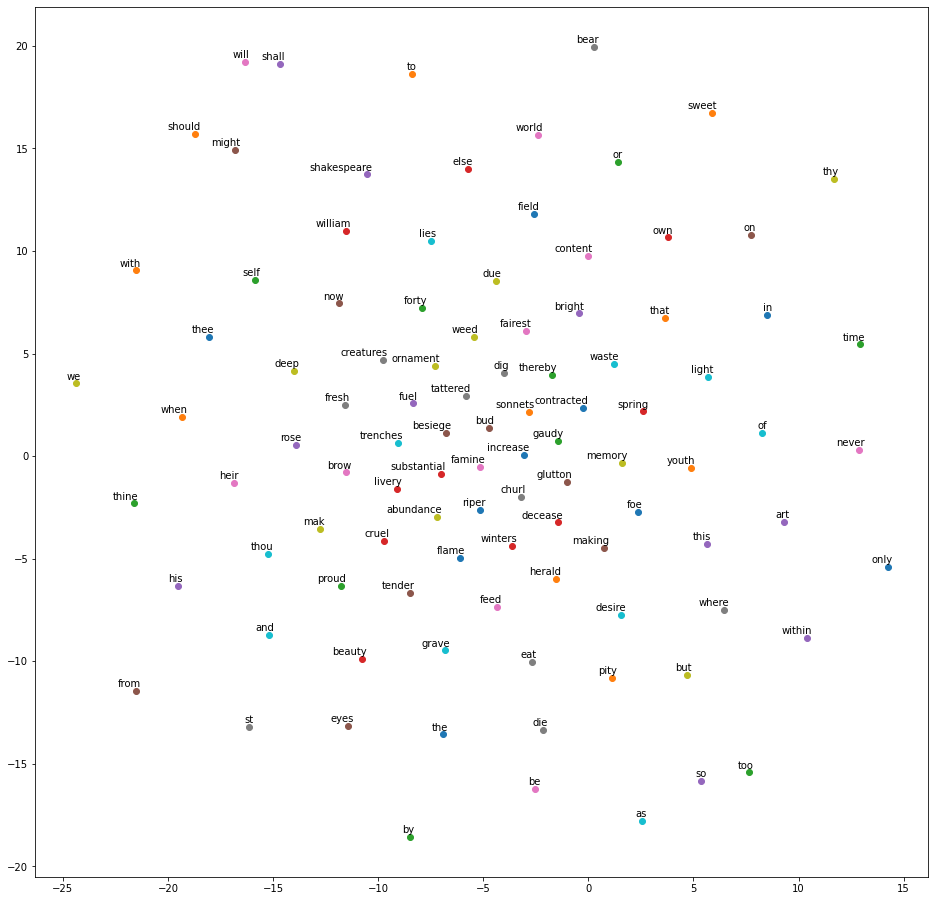

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    
#     fyi: to test specific labels instead of all the words in the vocab: 
#     labels = ['king', 'queen', 'prince', 'farmer', 'blue', 'red']
#     tokens = []
#     for label in labels: 
#         tokens.append(model[label])

    labels = []
    tokens = []
    

    # to speed up the process, let's limit to the first 100 elements
    count = 0
    for word in model.wv.vocab:
        if count < 100:
            # store the word embeddings of the words 
            tokens.append(model[word])
            # keep track of the labels too so that we can plot it in the graph below
            labels.append(word)
            count = count+1

    # define the parameters of the tsne model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    
    # for the embeddings of our tokes to the tsne model
    new_values = tsne_model.fit_transform(tokens)


    # Now let's plot the tsne projects for each of the tokens in 2D
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5